In [85]:
#Import libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns

In [3]:
#Read file
data = pd.read_csv("UltimateClassicRock.csv")

In [4]:
#Explore data
display(data.sample(10))
display(data.info())
print("Number of unique albums: ",data["Album"].nunique())
print("Number of unique artists: ",data["Artist"].nunique())
print(f"Song popularity range: {data['Popularity'].min()} - {data['Popularity'].max()}")

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
5499,Stop Breakin' Down Blues,Eric Clapton,Me and Mr. Johnson,2004,2:29,4,0.729,0.744,4,-6.410,0,0.0523,0.24500,0.000000,0.1950,0.707,127.032,23
4436,Shangri-La,Don Henley,The End Of The Innocence,1989,4:55,4,0.768,0.752,7,-9.085,1,0.0374,0.12900,0.000000,0.0604,0.742,101.366,22
3951,I've Been Waiting For You,David Bowie,Heathen,2002,2:59,4,0.570,0.911,9,-3.345,0,0.0378,0.00256,0.024900,0.2970,0.373,104.006,27
7205,Sleeping with the Dog - 2006 Remaster,Jethro Tull,Catfish Rising (2006 Remaster),1991,4:26,3,0.489,0.466,9,-11.388,0,0.0378,0.29500,0.000223,0.0888,0.588,171.994,8
7052,Cross-Eyed Mary - Steven Wilson Stereo Remix,Jethro Tull,Aqualung,1971,4:09,4,0.548,0.611,0,-10.107,1,0.0817,0.06240,0.001800,0.3210,0.622,86.298,21
4714,Tequila Sunrise,Eagles,Hell Freezes Over,1994,3:27,4,0.599,0.691,7,-11.135,1,0.0403,0.72000,0.005600,0.9800,0.716,107.034,43
3849,Scream Like a Baby,David Bowie,Scary Monsters (And Super Creeps),1980,3:36,4,0.568,0.842,8,-7.935,1,0.0443,0.11100,0.000030,0.0813,0.547,114.335,31
13945,The Fire Still Burns,Twisted Sister,Come Out and Play,1985,3:33,4,0.316,0.869,6,-10.997,1,0.0756,0.00165,0.000003,0.3830,0.376,122.890,27
12958,Variety Is the Spice of Life,The Doors,Other Voices,1971,2:54,4,0.852,0.555,0,-11.091,1,0.0465,0.56100,0.000023,0.0879,0.962,115.439,22
5871,I Know I'm Not Wrong - 2015 Remaster,Fleetwood Mac,Tusk,1979,3:01,4,0.583,0.758,0,-9.181,1,0.0279,0.01870,0.023000,0.0603,0.854,79.350,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             14418 non-null  object 
 1   Artist            14418 non-null  object 
 2   Album             14418 non-null  object 
 3   Year              14418 non-null  int64  
 4   Duration          14418 non-null  object 
 5   Time_Signature    14418 non-null  int64  
 6   Danceability      14418 non-null  float64
 7   Energy            14418 non-null  float64
 8   Key               14418 non-null  int64  
 9   Loudness          14418 non-null  float64
 10  Mode              14418 non-null  int64  
 11  Speechiness       14418 non-null  float64
 12  Acousticness      14418 non-null  float64
 13  Instrumentalness  14418 non-null  float64
 14  Liveness          14418 non-null  float64
 15  Valence           14418 non-null  float64
 16  Tempo             14418 non-null  float6

None

Number of unique albums:  1247
Number of unique artists:  94
Song popularity range: 0 - 91


In [84]:
# Assign an artist ID to each artist
data["artist_id"] = data.groupby(["Artist"]).ngroup()

# Assign an album ID to each album, taking into account that some album names can be from different artists
data["album_id"] = data.groupby(["Album","Artist","Year"]).ngroup()

print("Number of unique albums: ",data["album_id"].nunique())

Number of unique albums:  1282


In [83]:
# Use web scraping to check whether an artist is in Rolling Stone's 100 Greatest Artists of All Time
file_path = r"C:\Users\Saul\Desktop\Cursos\Ironhack\01_Classes\240926_W3D4_Class\Project 2 - EDA, SQL\goats.html" # Specify the path to your local HTML file
with open(file_path, 'r', encoding='utf-8') as html_file:
    content = html_file.read() # Open the file and read its contents
soup = BeautifulSoup(content, 'lxml')  # or use 'html.parser'
# print(soup.prettify())

# Create a list with all the artists from the Rolling Stone list
entries = soup.find_all("h3", attrs={'class' : 'ipc-title__text'})
entries_lst = []
i=0
for entry in entries:
    if i<9:
        entries_lst.append(entry.text[3:].replace("The ",""))
    elif i<99:
        entries_lst.append(entry.text[4:].replace("The ",""))
    elif i==99:
        entries_lst.append(entry.text[5:].replace("The ",""))
    else:
        continue
    i+=1

# Check whether the artists in the df are in the list from the web
data["goat"] = data["Artist"].isin(entries_lst)
# data.sample(5)

In [81]:
# Create the tables for SQL
tracks = data[["Track","album_id","Duration","Energy","Tempo","Popularity"]].reset_index().rename(columns={"index":"track_id"})
artists = data[["Artist","artist_id","goat"]].drop_duplicates().sort_values(by="artist_id")
albums = data[["Album","Year","album_id","artist_id"]].drop_duplicates().sort_values(by="Year")

# display(tracks)
# display(artists)
# display(albums)

In [45]:
# Export tables to csv files
tracks.to_csv("tracks.csv", index=False)
artists.to_csv("artists.csv", index=False)
albums.to_csv("albums.csv", index=False)

<Axes: xlabel='Tempo', ylabel='Energy'>

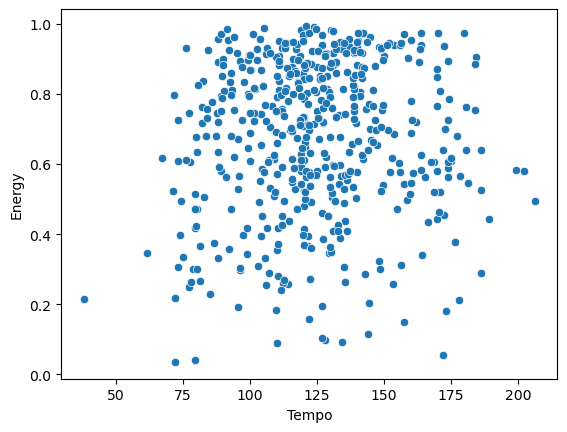

In [90]:
# Is there any relationship between tempo and energy?
sns.scatterplot(x="Tempo", y="Energy", data=tracks.sample(500))

In [125]:
# Check results from MySQL-query for Question 1
data[data["Year"] == 1995].sort_values(by="Popularity", ascending=False).head(1)

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,album_id,artist_id
2842,This Ain't A Love Song,Bon Jovi,These Days,1995,5:06,3,0.348,0.635,4,-6.836,1,0.0386,0.0932,0.0,0.126,0.144,87.974,60,1117,16
